## Train, Test or Retrain multiple models 

Loading data from: datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz
Data loaded: X=(2746, 8, 375), y=(2746,)


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset split: Train=1922, Val=411, Test=413
Dataloaders ready

Processing  TCNModel_withBase...

Loading model from checkpoint instead of training:
  logs/TCNModel_withBase/version_42_10_250hz_1.5window/checkpoints/best-2730-val_acc=0.839.ckpt


You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Class 5 accuracy: 0.781
Class 7 accuracy: 0.930
Class 8.6 accuracy: 0.435
Class 10.5 accuracy: 0.954
Class 11 accuracy: 0.640
Class 12 accuracy: 0.862
Class 13.4 accuracy: 0.882
Class 15.2 accuracy: 0.860
Class 17 accuracy: 0.120
Class 18.1 accuracy: 0.889


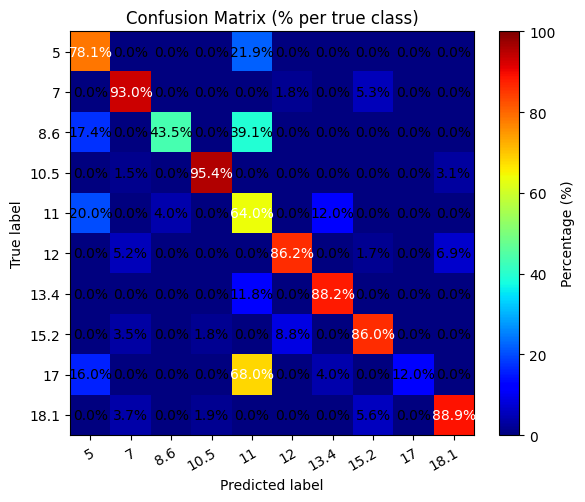

TCNModel_withBase: Test accuracy = 0.801

Plotting TCNModel_withBase: Test Accuracy = 0.801


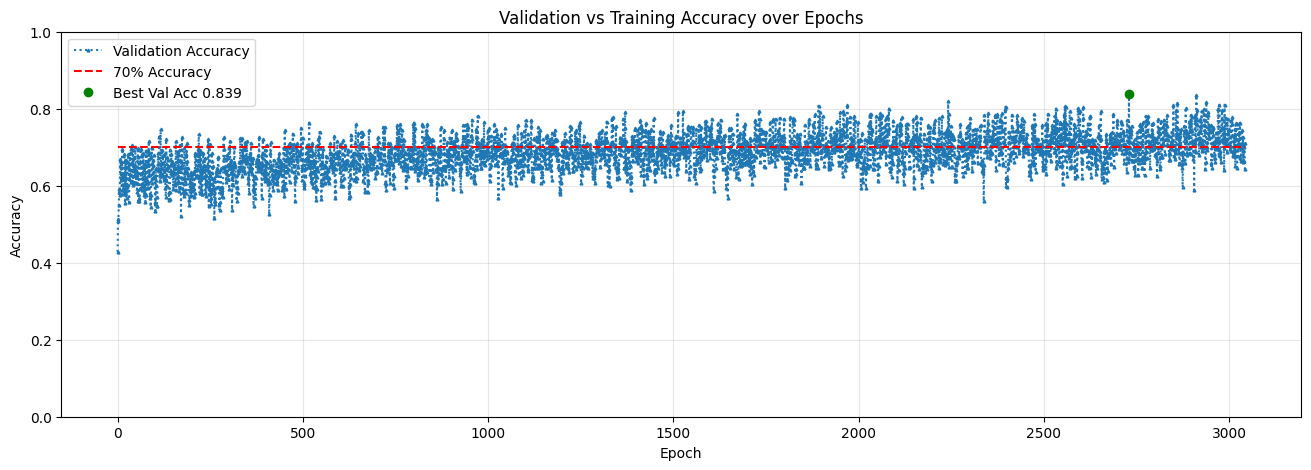


All models processed successfully!



In [ ]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",   # no weights 
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   # weights 0.5
    "data_path": "datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz",  # no weights 
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:20:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        # "num_classes": 4,
        # "class_labels": [10.5, 12, 15.2, 18.1],
        # "num_classes": 5,
        # "class_labels": [0, 10.5, 12, 15.2, 18.1],
        "num_classes": 10,
        "class_labels": [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1],
    },
    
    "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_42_10_best/checkpoints/best-2730-val_acc=0.839.ckpt",    # best 10 label model

    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_41_5_retrained_best/checkpoints/best-00-val_acc=0.813.ckpt", # best 5 label model
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/checkpoints/best-11408-val_acc=0.948.ckpt", # best 4 label model before retraining
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_44_4_retrained_best/checkpoints/best-00-val_acc=0.953.ckpt",              # best 4 label model after retraining
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Trying Melspetrogram with 2D CNN

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Dataset_torch import EEGDataset, EEGDataset_mel, EEGDataset_mel_with_filters
from Utils import plot_all_results
import Models_2D

models = [
    # Models_2D.EEGClassifier_mel,             # 0.69 on 2mins, 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_with_res,    # 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_small,       # 0.70 on 2mins
    Models_2D.EEGNet_for_mel
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no0.npz",
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    
    "DATASET_CLASS" : EEGDataset_mel_with_filters,
    
    "OCCIPITAL_SLICE": slice(0, 8), 
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,   
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on eyes open closed data

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
import Models_1D
import Random_models

models_ = [
    Models_1D.EEGClassifier,  # with notch on 2mins: 0., test: 0., on 15mins: 0. test: 0.
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0., on 15mins: 0.
]

shared_parameters_eyes = {
    # "data_path": "datasets/numpy/eyes_filter.npz",
    "data_path": "datasets/numpy/processed_eeg_data_eyes.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [0, 1],
    }
}
results, test_loader = run_multiple_models(models, shared_parameters_eyes)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Plot any saved model 

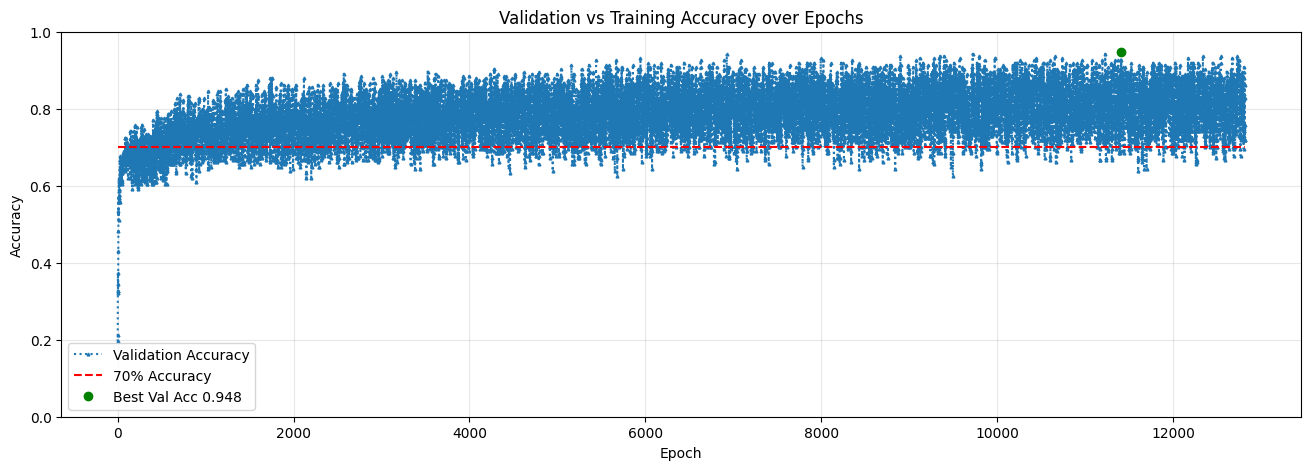

In [3]:
from Utils import plot_training_metrics

csv_path = "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/metrics.csv"
plot_training_metrics(csv_path)